### 01.Problem
 Predicting Height

### 02. Dataset
 X-Age| Y-Height

### 03.Load and Summarize the Data

In [1]:
import pandas as pd
df=pd.read_csv("dataset.csv")
df.head()
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [5]:
df.isnull().any()

Age       False
Height    False
dtype: bool

### 04. Segregate Dataset into X & Y

In [2]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### 05. Splitting dataset to train & test for Validation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 06.Model Training and Evaluation

In [8]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(f"R2 Score is {r2_score(y_test,y_pred)*100:.2f}")

1.8
R2 Score is 99.43


### 07.Model Prediction

In [10]:
Age=int(input("Enter your age:"))
pred=model.predict([[Age]]) 
print("Your predicted height is:",pred)

Your predicted height is: [142.]


### 08.Visualizing Graph

C:\Users\SIVA1201\AppData\Local\Temp\ipykernel_25828\1975810061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_val=np.arange(min(X_train),max(X_train),0.01)


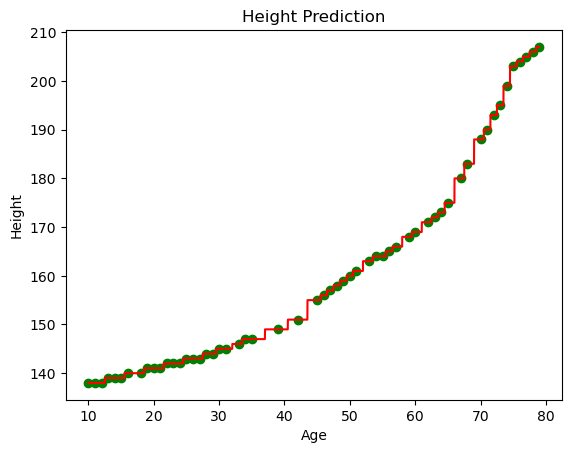

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
X_val=np.arange(min(X_train),max(X_train),0.01)
X_val=X_val.reshape((len(X_val),1))
plt.scatter(X_train,y_train,color='green')
plt.plot(X_val,model.predict(X_val),color='red')
plt.title('Height Prediction')
plt.xlabel('Age')
plt.ylabel('Height')
plt.figure()
plt.show()